In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:
# 读取四张表的数据
# 读取了订单和产品的关联，csv比较大
prior = pd.read_csv("./data/instacart/order_products__prior.csv")

In [4]:
# 产品id和产品名称的对应
products = pd.read_csv("./data/instacart/products.csv")

In [5]:
# 订单id和用户id的对应，csv比较大
orders = pd.read_csv("./data/instacart/orders.csv")

In [6]:
# 超市货架间的过道，过道放的产品的品类
aisles = pd.read_csv("./data/instacart/aisles.csv")

In [7]:
# 合并四张表到一张表（用户-物品类别） on显示指定“外键”
_mg = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_mg, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])

In [7]:
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [1]:
mt.shape

NameError: name 'mt' is not defined

In [8]:
# 交叉表（特殊的分组工具），如果在这一步内存不够了，重启一下jupyter
cross = pd.crosstab(mt['user_id'], mt['aisle'])

In [9]:
cross.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [10]:
cross.shape

(206209, 134)

In [11]:
# 进行主成分分析；保留90%的特征
pca = PCA(n_components=0.9)
pca

PCA(n_components=0.9)

In [12]:
data = pca.fit_transform(cross)  # 自适应转换
print(data)
data.shape  # 只剩下了27个特征

[[-2.42156587e+01  2.42942720e+00 -2.46636975e+00 ...  6.86800336e-01
   1.69439402e+00 -2.34323022e+00]
 [ 6.46320806e+00  3.67511165e+01  8.38255336e+00 ...  4.12121252e+00
   2.44689740e+00 -4.28348478e+00]
 [-7.99030162e+00  2.40438257e+00 -1.10300641e+01 ...  1.77534453e+00
  -4.44194030e-01  7.86665571e-01]
 ...
 [ 8.61143331e+00  7.70129866e+00  7.95240226e+00 ... -2.74252456e+00
   1.07112531e+00 -6.31925661e-02]
 [ 8.40862199e+01  2.04187340e+01  8.05410372e+00 ...  7.27554259e-01
   3.51339470e+00 -1.79079914e+01]
 [-1.39534562e+01  6.64621821e+00 -5.23030367e+00 ...  8.25329076e-01
   1.38230701e+00 -2.41942061e+00]]


(206209, 27)

In [13]:
# 把样本数量减少
x = data[:500]
x.shape

(500, 27)

In [14]:
x

array([[-24.21565874,   2.4294272 ,  -2.46636975, ...,   0.68680034,
          1.69439402,  -2.34323022],
       [  6.46320806,  36.75111647,   8.38255336, ...,   4.12121252,
          2.4468974 ,  -4.28348478],
       [ -7.99030162,   2.40438257, -11.03006405, ...,   1.77534453,
         -0.44419403,   0.78666557],
       ...,
       [-11.92661183,  -6.28156437,   6.49043833, ...,  -0.93499096,
         -0.1409791 ,   0.04370174],
       [-18.05675245,  -0.42589035,  -3.92660866, ...,  -1.02048351,
         -0.95283767,   0.90135767],
       [-24.62244434,  -0.5635177 ,  -0.90551124, ...,   0.86904501,
         -2.15569229,  -0.40915483]])

In [15]:
x.max()

407.18563418250585

In [16]:
x.min()

-242.34847949305873

In [17]:
# 假设用户一共分为四个类别
km = KMeans(n_clusters=4)

In [18]:
km.fit(x)  # 开始训练（体会无监督学习的特点）

KMeans(n_clusters=4)

In [19]:
#开始预测
predict = km.predict(x)

In [20]:
predict  # 结果有0，1，2，3四类

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
len(predict)  # 500

500

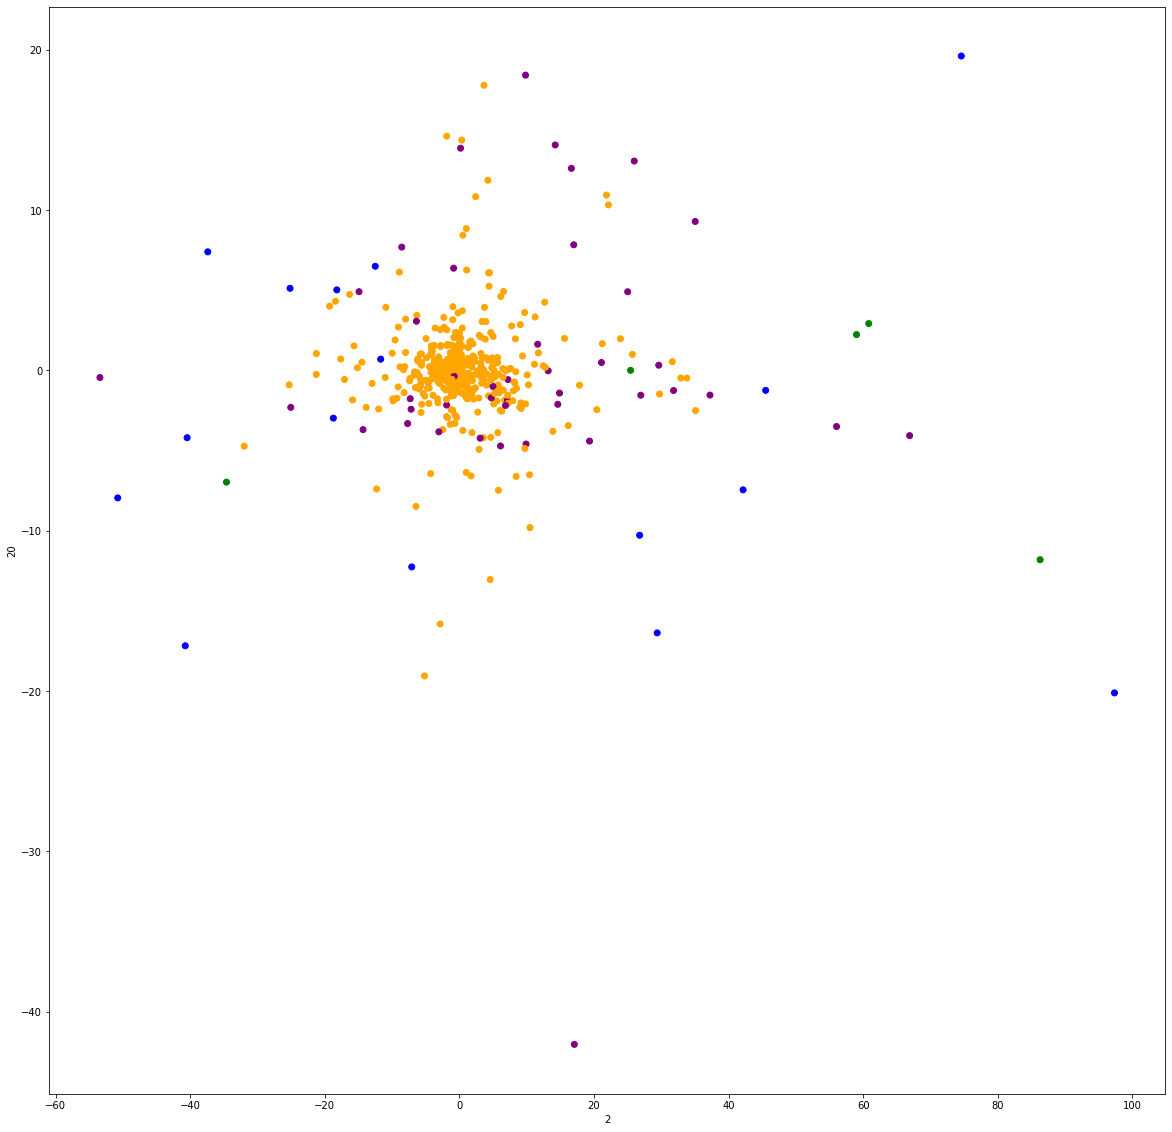

In [29]:
# 显示聚类的结果
plt.figure(figsize=(20, 20))

# 建立四个颜色的列表
colored = ['orange', 'green', 'blue', 'purple']
colr = [colored[i] for i in predict]
# 取了任意两个特征2 20来看聚类的散点图
plt.scatter(x[:, 2], x[:, 20], color=colr)

plt.xlabel("2")
plt.ylabel("20")

plt.show()

In [24]:
x

array([[-24.21565874,   2.4294272 ,  -2.46636975, ...,   0.68680034,
          1.69439402,  -2.34323022],
       [  6.46320806,  36.75111647,   8.38255336, ...,   4.12121252,
          2.4468974 ,  -4.28348478],
       [ -7.99030162,   2.40438257, -11.03006405, ...,   1.77534453,
         -0.44419403,   0.78666557],
       ...,
       [-11.92661183,  -6.28156437,   6.49043833, ...,  -0.93499096,
         -0.1409791 ,   0.04370174],
       [-18.05675245,  -0.42589035,  -3.92660866, ...,  -1.02048351,
         -0.95283767,   0.90135767],
       [-24.62244434,  -0.5635177 ,  -0.90551124, ...,   0.86904501,
         -2.15569229,  -0.40915483]])

In [30]:
# 评判聚类效果，轮廓系数，聚类效果很难超过0.7，可以通过这个得分去调整上面KMeans的n_clusters
silhouette_score(x, predict)

0.6039088771646132

In [31]:
#改为2时的结果
km = KMeans(n_clusters=2)
km.fit(x)  # 开始训练
predict = km.predict(x)
silhouette_score(x, predict)

0.6779999767609065

In [32]:
#改为3时的结果
km = KMeans(n_clusters=3)
km.fit(x)  #开始训练
predict = km.predict(x)
silhouette_score(x, predict)


0.6398520493543717